In [92]:
import pandas as pd
import numpy as np
import scipy as sp
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import math
import seaborn as sb
import scipy.special as sc


In [24]:
k = 10
n = 120

In [157]:
alpha_1 = 0.15
alpha_2 = 0.05
alpha_3 = 0.02

In [158]:
x = [4, 3, 3, 5, 6, 8, 4, 4, 2, 4, 6, 4, 4, 2, 3, 5, 4, 7, 4, 1, 4, 3, 2, 3,
7, 2, 4, 4, 5, 5, 4, 3, 3, 5, 3, 5, 1, 3, 2, 5, 2, 5, 3, 4, 3, 3, 5, 5, 3,
1, 4, 4, 4, 3, 3, 3, 5, 3, 4, 2, 4, 4, 3, 4, 3, 4, 3, 3, 5, 4, 2, 6, 2, 5,
3, 4, 4, 2, 3, 5, 3, 4, 6, 5, 5, 7, 2, 1, 5, 3, 5, 4, 3, 2, 1, 5, 5, 3, 5,
4, 5, 6, 3, 3, 2, 8, 4, 3, 3, 4, 2, 4, 5, 0, 4, 3, 7, 4, 2, 5]

In [159]:
#введём статистику K
k_stat = sum(x)
print(k_stat)

453


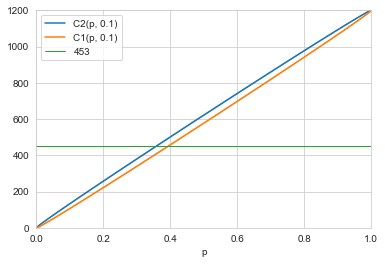

In [160]:
sb.set_style('whitegrid')

px = np.arange(0.0000000001, 1, 0.0001)
y1 = sp.stats.binom.ppf(0.9, n * k, px)
y2 = sp.stats.binom.ppf(0.1, n * k, px)
plt.plot(px, y1, label = 'C2(p, 0.1)')
plt.plot(px, y2, label = 'C1(p, 0.1)')
plt.step([0, 1],[k_stat, k_stat], linewidth = 1, label = '453')
plt.xlabel('p')
plt.xlim([0, 1])
plt.ylim([0, 1200])
plt.legend()
plt.show()

In [161]:
#Оценка с помощью уравнений Клапейрона-Пирсона
p_d_1 = sp.special.betaincinv(k_stat, n * k - k_stat + 1, alpha_1 / 2)
p_u_1 = sp.special.betaincinv(k_stat + 1, n * k - k_stat, 1 - (alpha_1 / 2))
print("для альфа_1: ", p_d_1, "и ", p_u_1)

p_d_2 = sp.special.betaincinv(k_stat, n * k - k_stat + 1, alpha_2 / 2)
p_u_2 = sp.special.betaincinv(k_stat + 1, n * k - k_stat, 1 - (alpha_2 / 2))
print("для альфа_2: ", p_d_2, "и ", p_u_2)

p_d_3 = sp.special.betaincinv(k_stat, n * k - k_stat + 1, alpha_3 / 2)
p_u_3 = sp.special.betaincinv(k_stat + 1, n * k - k_stat, 1 - (alpha_3 / 2))
print("для альфа_3: ", p_d_3, "и ", p_u_3)

print("заметим, истинное значение вероятности p = 0.4 лежит между верхним и нижним значениями для каждого параметра альфа")

для альфа_1:  0.35713100937940645 и  0.3982275407501735
для альфа_2:  0.3499845805297377 и  0.4056174286498774
для альфа_3:  0.3449808073009963 и  0.4108365451743796
заметим, истинное значение вероятности p = 0.4 лежит между верхним и нижним значениями для каждого параметра альфа


In [162]:
#по ЦПТ найдём приближённые доверительные интервалы для p
param = k_stat / (k * n)

alpha1 = 0.15
alpha2 = 0.05
alpha3 = 0.02

u1 = sp.stats.norm.ppf(1 - alpha1)
u2 = sp.stats.norm.ppf(1 - alpha2)
u3 = sp.stats.norm.ppf(1 - alpha3)

pl1 = param - u1 / ((n * k) ** 0.5) * (param * (1 - param)) ** 0.5
pr1 = param + u1 / ((n * k) ** 0.5) * (param * (1 - param)) ** 0.5

pl2 = param - u2 / ((n * k) ** 0.5) * (param * (1 - param)) ** 0.5
pr2 = param + u2 / ((n * k) ** 0.5) * (param * (1 - param)) ** 0.5

pl3 = param - u3 / ((n * k) ** 0.5) * (param * (1 - param)) ** 0.5
pr3 = param + u3 / ((n * k) ** 0.5) * (param * (1 - param)) ** 0.5

In [163]:
df = pd.DataFrame({"alpha_1": [pl1, pr1], "alpha_2": [pl2, pr2], "alpha_3": [pl3, pr3]})

In [164]:
print(df)
print("заметим, что истинное значение вероятности p = 0.4 лежит между правым и левым значениями для каждого параметра альфа")

    alpha_1   alpha_2  alpha_3
0  0.362996  0.354482  0.34876
1  0.392004  0.400518  0.40624
заметим, что истинное значение вероятности p = 0.4 лежит между правым и левым значениями для каждого параметра альфа


In [151]:
def cumulative(p):
    cp = np.array([])
    s = 0
    for element in p:
        s += element
        cp = np.append(cp, s) 
        
    return cp

def bernuli(p):
    prob = np.array([])
    for i in range(k + 1):
        prob = np.append(prob, sc.comb(k,i) * p ** i * (1 - p) ** (k - i))
    
    return prob

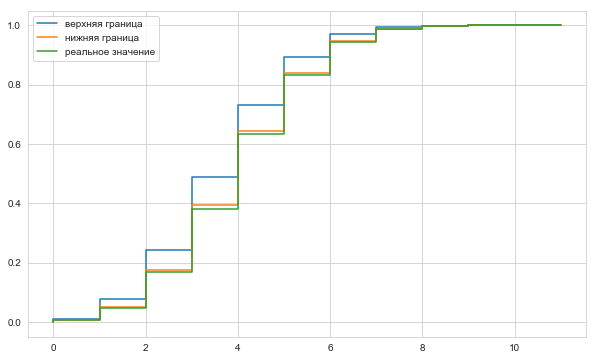

In [156]:
plt.figure(figsize = (10, 6))
rg = np.arange(0, k + 2, 1)

bernuli_pl3 = bernuli(pl3)
cumulative_pl3 = cumulative(bernuli_pl3)
plt.step(rg, [0] + cumulative_pl1.tolist(), label = 'верхняя граница')

bernuli_pr3 = bernuli(pr3)
cumulative_pr3 = cumulative(bernuli_pr3)
plt.step(rg, [0] + cumulative_pr1.tolist(), label = 'нижняя граница')

bernuli_p = bernuli(0.4)
cumulative_p = cumulative(bernuli_p)
plt.step(rg, [0] + cumulative_p.tolist(), label = 'реальное значение')

plt.legend()